<a href="https://colab.research.google.com/github/carascott/skills-introduction-to-github/blob/main/VizWorkshops_DS2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
df = pd.read_csv('/content/airbnb_dataset.csv')
print(df.head())

    Latitude  Longitude  Price    Rating
0  40.841284 -73.870827    278  4.291962
1  40.716605 -73.907099    160  3.931463
2  40.796904 -73.754470    466  4.639179
3  40.787812 -73.991768    374  4.173719
4  40.872483 -73.859741    343  4.034350


In [10]:
# Finding most and least expensive airbnb
most_expensive = df['Price'].max()
cheapest = df['Price'].min()
print(f"Most expensive listing: ${most_expensive}")
print(f"Cheapest listing: ${cheapest}")

Most expensive listing: $495
Cheapest listing: $58


In [14]:
# Finding best and worst rated airbnb, including their price
highest_rated = df.loc[df['Rating'].idxmax()]
lowest_rated = df.loc[df['Rating'].idxmin()]
print(f"Highest rated listing: Rating = {highest_rated['Rating']}, Price = {highest_rated['Price']}")
print(f"Lowest rated listing: Rating = {lowest_rated['Rating']}, Price = {lowest_rated['Price']}")

Highest rated listing: Rating = 4.995745673012713, Price = 90.0
Lowest rated listing: Rating = 3.5008474743650435, Price = 129.0


           Price    Rating
Price   1.000000 -0.169405
Rating -0.169405  1.000000


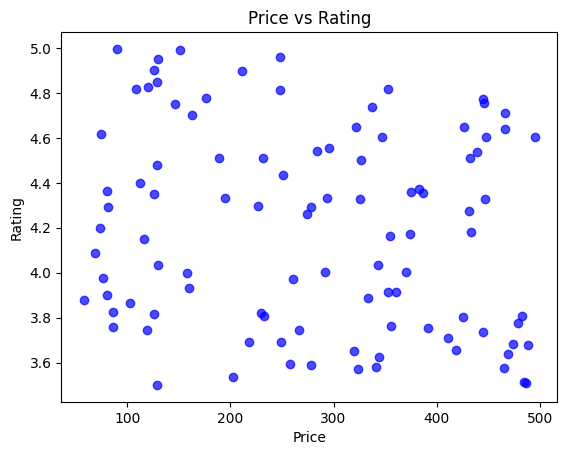

In [16]:
# Testing correlation between price & rating of airbnb --> there isn't one
print(df[['Price', 'Rating']].corr())

import matplotlib.pyplot as plt

plt.scatter(df['Price'], df['Rating'], alpha=0.7, color='blue')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [17]:
# Computing averages
print("Average Listing Price:", df['Price'].mean())
print("Average Listing Rating:", df['Rating'].mean())

Average Price: 278.57
Average Rating: 4.193474502652132


In [20]:
# Categorizing prices --> most are "medium" expensive
price_bins = pd.cut(df['Price'], bins=[0, 200, 400, 600], labels=['Low', 'Medium', 'High'])
print(price_bins.value_counts())

Price
Medium    43
Low       33
High      24
Name: count, dtype: int64


In [36]:
# Categorizing ratings --> most are "low" rated when categorized this way
# Recall there is no lower rating than a 3.5 in this dataset
rating_bins = pd.cut(df['Rating'], bins=[3.5, 4, 4.25, 4.5], labels=['Low', 'Medium', 'High'])
print(rating_bins.value_counts())

Rating
Low       41
High      17
Medium    10
Name: count, dtype: int64


In [39]:
# Visualizing where the data points are
import folium
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)
for _, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='red').add_to(m)
m

In [40]:
# Visualizing location by price --> most expensive are typically along the coast, rather than inland
from folium.plugins import HeatMap
from folium import plugins
from branca.colormap import linear

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)
price_scale = linear.YlGnBu_09.scale(df['Price'].min(), df['Price'].max())

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=price_scale(row['Price']),
        fill=True,
        fill_color=price_scale(row['Price']),
        fill_opacity=0.6
    ).add_to(m)
price_scale.add_to(m)
m

In [44]:
df = pd.read_csv('gapminder_dataset.csv')
print(df.head())

    Country  Year  Life Expectancy  GDP per Capita  Population
0  CountryA  2000        67.816868    41183.604672     6425344
1  CountryB  2001        84.116896    14342.718236    20338895
2  CountryC  2002        67.825589     8416.880255    90423743
3  CountryD  2003        66.455000    43442.019300    69570923
4  CountryA  2004        81.368979    36191.006776    80345674


In [45]:
# Looking at overall trends
print(df.describe())

              Year  Life Expectancy  GDP per Capita    Population
count    40.000000        40.000000       40.000000  4.000000e+01
mean   2004.500000        73.605918    30579.601603  5.182939e+07
std       2.908872         7.265173    14088.416758  2.934211e+07
min    2000.000000        60.893681     5952.043535  1.793847e+06
25%    2002.000000        67.319854    16705.214849  2.548042e+07
50%    2004.500000        75.276327    32695.330568  5.069711e+07
75%    2007.000000        80.248435    43373.240867  7.744973e+07
max    2009.000000        84.223830    49328.129271  9.495476e+07


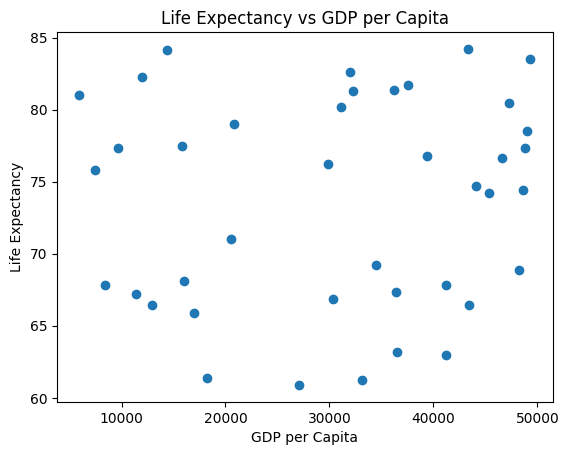

In [47]:
# Visualizing life expectancy v GDP --> no correlation
plt.scatter(df['GDP per Capita'], df['Life Expectancy'])
plt.title('Life Expectancy vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

In [51]:
# Finding the country with the highest variables --> CountryC has highest life expectancy AND GDP per capita
highest_life_expectancy = df.loc[df['Life Expectancy'].idxmax()]
highest_population = df.loc[df['Population'].idxmax()]
highest_gdp = df.loc[df['GDP per Capita'].idxmax()]

print("Country with the Highest Life Expectancy:")
print(highest_life_expectancy)
print("\nCountry with the Highest Population:")
print(highest_population)
print("\nCountry with the Highest GDP per Capita:")
print(highest_gdp)

Country with the Highest Life Expectancy:
Country                CountryC
Year                       2000
Life Expectancy        84.22383
GDP per Capita     43350.314723
Population             62354674
Name: 10, dtype: object

Country with the Highest Population:
Country                CountryA
Year                       2008
Life Expectancy       80.172978
GDP per Capita     31082.819967
Population             94954756
Name: 28, dtype: object

Country with the Highest GDP per Capita:
Country                CountryC
Year                       2004
Life Expectancy       83.507435
GDP per Capita     49328.129271
Population             32048484
Name: 14, dtype: object


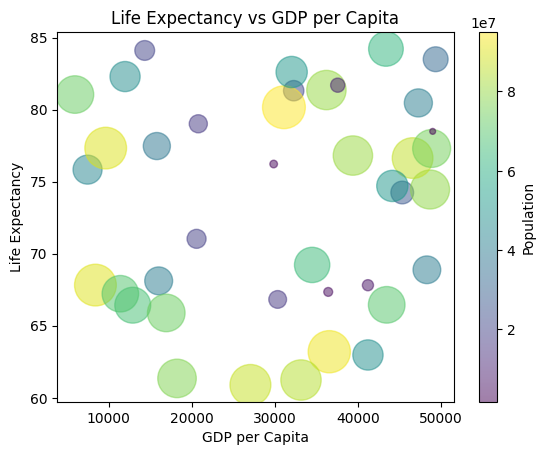

In [53]:
# Visualizing life expectancy v GDP with population scale --> no discernable trend
plt.scatter(df['GDP per Capita'], df['Life Expectancy'], s=df['Population']/100000, c=df['Population'], alpha=0.5) # s sets size, c sets color
plt.title('Life Expectancy vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.colorbar(label='Population')
plt.show()